# Plots for a hexagonal version of Flory-Huggins

If we work on a grid with a hexagonal rather than a square lattice, we get three-particle interactions instead of two-particle interactions. Exploiting the fact that for phase coexistence neither constant nor linear terms in the free energy matter, we can write our free energy density as
$$ f(\phi) = k_\mathrm{B} T \left[ \phi \log(\phi) + (1-\phi) \log(1-\phi) + \chi_1 \phi^2 (1-\phi) + \chi_2 \phi (1-\phi)^2 \right].$$

In [3]:
# Python libraries
%reset -f
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
from scipy.optimize import fsolve

In [4]:
# The free energy, chemical potential, and osmotic pressure (per kB T).
def f(x, c1, c2): return x * np.log(x) + (1-x) * np.log(1-x) + c1 * x * x * (1-x) + c2 * x * (1-x) * (1-x)
def mu(x, c1, c2): return np.log(x) - np.log(1-x) + 2 * c1 * x - 3 * c1 * x * x + 3 * c2 * x * x - 4 * c2 * x + c2
def p(x, c1, c2): return -np.log(1-x) + x * x * (c1 - 2 * c1 * x - 2 * c2 * (1-x))

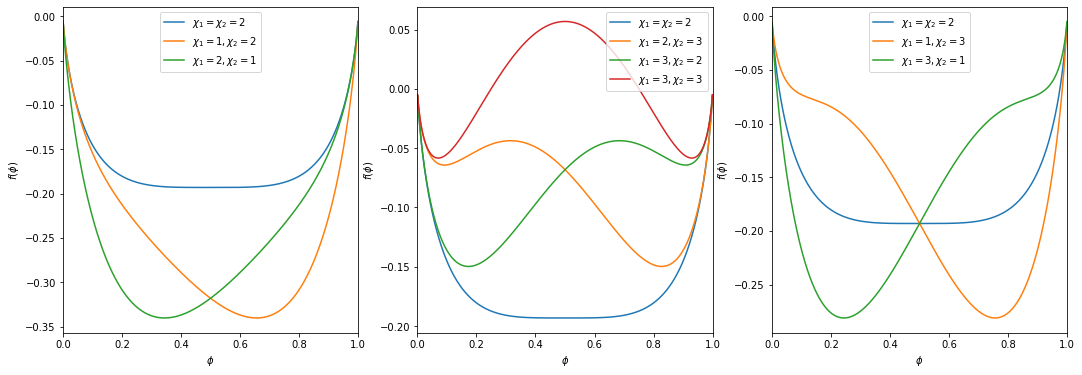

In [3]:
# Plot the free energy, for a range of different values of chi_1 and chi_2 (c1=c2=2 is the critical value).
x = np.linspace(0.001,.999,998)
plt.figure(figsize=(18,6)) # NB: Size in inches.
plt.subplot(1,3,1)
plt.plot(x, f(x, 2, 2), x, f(x, 1, 2), x, f(x, 2, 1))
#plt.title('Hare / lynx population dynamics')
plt.xlim((0,1))
plt.xlabel('$\phi$')
plt.ylabel('$f(\phi)$')
plt.legend(['$\chi_1 = \chi_2 = 2$', '$\chi_1 = 1, \chi_2 = 2$', '$\chi_1 = 2, \chi_2 = 1$'])
#plt.grid(True)

plt.subplot(1,3,2)
plt.plot(x, f(x, 2, 2), x, f(x, 2, 3), x, f(x, 3, 2), x , f(x, 3, 3))
plt.xlim((0,1))
plt.xlabel('$\phi$')
plt.ylabel('$f(\phi)$')
plt.legend(['$\chi_1 = \chi_2 = 2$', '$\chi_1 = 2, \chi_2 = 3$', '$\chi_1 = 3, \chi_2 = 2$', '$\chi_1 = 3, \chi_2 = 3$'])

plt.subplot(1,3,3)
plt.plot(x, f(x, 2, 2), x, f(x, 1, 3), x, f(x, 3, 1))
plt.xlim((0,1))
plt.xlabel('$\phi$')
plt.ylabel('$f(\phi)$')
plt.legend(['$\chi_1 = \chi_2 = 2$', '$\chi_1 = 1, \chi_2 = 3$', '$\chi_1 = 3, \chi_2 = 1$'])

plt.savefig("FHhexagonalplots.pdf", format="pdf", bbox_inches="tight")


# Coexistence points

To find coexistence points on the line with $\chi_1 = 3$ and $\chi_2 = 1$, we need both the chemical potential and the osmotic pressure:
$$ \mu(\phi) = \frac{\partial f(\phi)}{\partial \phi} = k_\mathrm{B} T \left[ \log(\phi) - \log(1-\phi) + 2 \chi_1 \phi (1-\phi) - \chi_1 \phi^2 + \chi_2 (1-\phi)^2 - 2 \chi_2 \phi (1-\phi) \right]$$
and
$$ p(\phi) = -f(\phi) + \phi \frac{\partial f(\phi)}{\partial \phi} + f(0) = k_\mathrm{B} T \left[ - \log(1-\phi) + \chi_1 \phi^2 (1-2\phi) - 2 \chi_2 \phi^2 (1-\phi)\right].$$

In [5]:
# System to solve for coexistence
def coexistfunc(x, c1, c2):
    return [mu(x[0], c1, c2) - mu(x[1], c1, c2), p(x[0], c1, c2) - p(x[1], c1, c2)]

In [6]:
# System to solve for coexistence
def coexistfunc(x):
    return [mu(x[0], 3, 1) - mu(x[1], 3, 1), p(x[0], 3, 1) - p(x[1], 3, 1)]

In [7]:
coexistencepoints = fsolve(coexistfunc, [.35, .95])
coexistencepoints

array([0.34403443, 0.94030724])

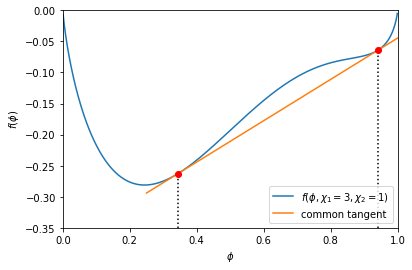

In [19]:
coexistencepoints
x = np.linspace(0.001,.999,998)
plt.plot(x, f(x, 3, 1))
x = np.linspace(.25,1,750)
plt.plot(x, ((f(coexistencepoints[1], 3, 1) - f(coexistencepoints[0], 3, 1)) / (coexistencepoints[1] - coexistencepoints[0])) * (x - coexistencepoints[0]) + f(coexistencepoints[0], 3, 1))
plt.vlines(x=coexistencepoints, ymin=-0.35, ymax = f(coexistencepoints, 3, 1), color = 'k', linestyle = ':')
plt.plot(coexistencepoints, f(coexistencepoints, 3, 1), 'ro')
plt.xlim((0,1))
plt.ylim((-0.35,0))
plt.xlabel('$\phi$')
plt.ylabel('$f(\phi)$')
plt.legend(['$f(\phi, \chi_1 = 3, \chi_2 = 1)$', 'common tangent'])
plt.savefig("FHhexagonalcommontangent.pdf", format="pdf", bbox_inches="tight")

In [8]:
# Check if there really is a minimum in the total free energy.
def Ftotal(x):
    return ((coexistencepoints[1]-x)/(coexistencepoints[1]-coexistencepoints[0]))*f(coexistencepoints[0], 3, 1) + ((x-coexistencepoints[0])/(coexistencepoints[1]-coexistencepoints[0]))*f(coexistencepoints[1], 3, 1)

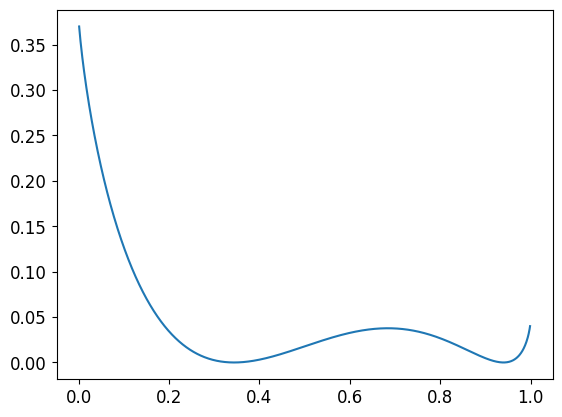

In [11]:
x = np.linspace(0.001,.999,998)
plt.plot(x, f(x, 3, 1)-Ftotal(x))